In [13]:
#Importando Librerias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [15]:
#leyendo el conjunto de mi dataset
df= pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [17]:
#Pequeña muestra de mi conjunto de datos
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [19]:
#Forma del conjunto de mi dataset
df.shape

(4340, 8)

In [27]:
#imprimiendo los valores únicos en cuatro columnas de mi DataFrame
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())
#Estas son las variables categoricas de nuestro conjunto de datos

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [29]:
#Identificando valores nulos
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [31]:
#describiendo mi dataframe
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [35]:
#Eliminamos la columna 'name' ya que no es necesaria para predecir los valores que necesitamos y esto causa inconvenientes a la hora de realizar nuestro modelo
df= df.drop('name', axis=1)

In [37]:
# Mostrando como quedo nuestro dataframe sin la columna 'name'
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [41]:
# Aca se calcula el número de años que han pasado
df['This_Year']= 2024
df['Number_Of_Years']=df['This_Year']-df['year']
df= df.drop('year', axis=1)
df= df.drop('This_Year', axis=1)

In [43]:
# a continuación los mostramos con nuestra en la columna final: 'Number_Of_Years'
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Number_Of_Years
0,60000,70000,Petrol,Individual,Manual,First Owner,17
1,135000,50000,Petrol,Individual,Manual,First Owner,17
2,600000,100000,Diesel,Individual,Manual,First Owner,12
3,250000,46000,Petrol,Individual,Manual,First Owner,7
4,450000,141000,Diesel,Individual,Manual,Second Owner,10


In [45]:
# Ahora convertimos las columnas categóricas en valores numéricos en mi DataFrame df, utilizando la clase LabelEncoder de sklearn.preprocessing.
from sklearn.preprocessing import LabelEncoder

# inicializando el LabelEncoder (codificador de etiquetas)
label_encoder = LabelEncoder()

# ajustamos y transformamos las columnas categoricas
df['Fuel_Type_encoded'] = label_encoder.fit_transform(df['fuel'])
df['Seller_Type_encoded'] = label_encoder.fit_transform(df['seller_type'])
df['Transmission_encoded'] = label_encoder.fit_transform(df['transmission'])
df['Owner_encoded'] = label_encoder.fit_transform(df['owner'])
df= df.drop('fuel', axis=1)
df= df.drop('seller_type', axis=1)
df= df.drop('transmission', axis=1)
df= df.drop('owner', axis=1)

In [47]:
#mostrando como quedaron
df.head()

,selling_price,km_driven,Number_Of_Years,Fuel_Type_encoded,Seller_Type_encoded,Transmission_encoded,Owner_encoded
0,60000,70000,17,4,1,1,0
1,135000,50000,17,4,1,1,0
2,600000,100000,12,1,1,1,0
3,250000,46000,7,4,1,1,0
4,450000,141000,10,1,1,1,2


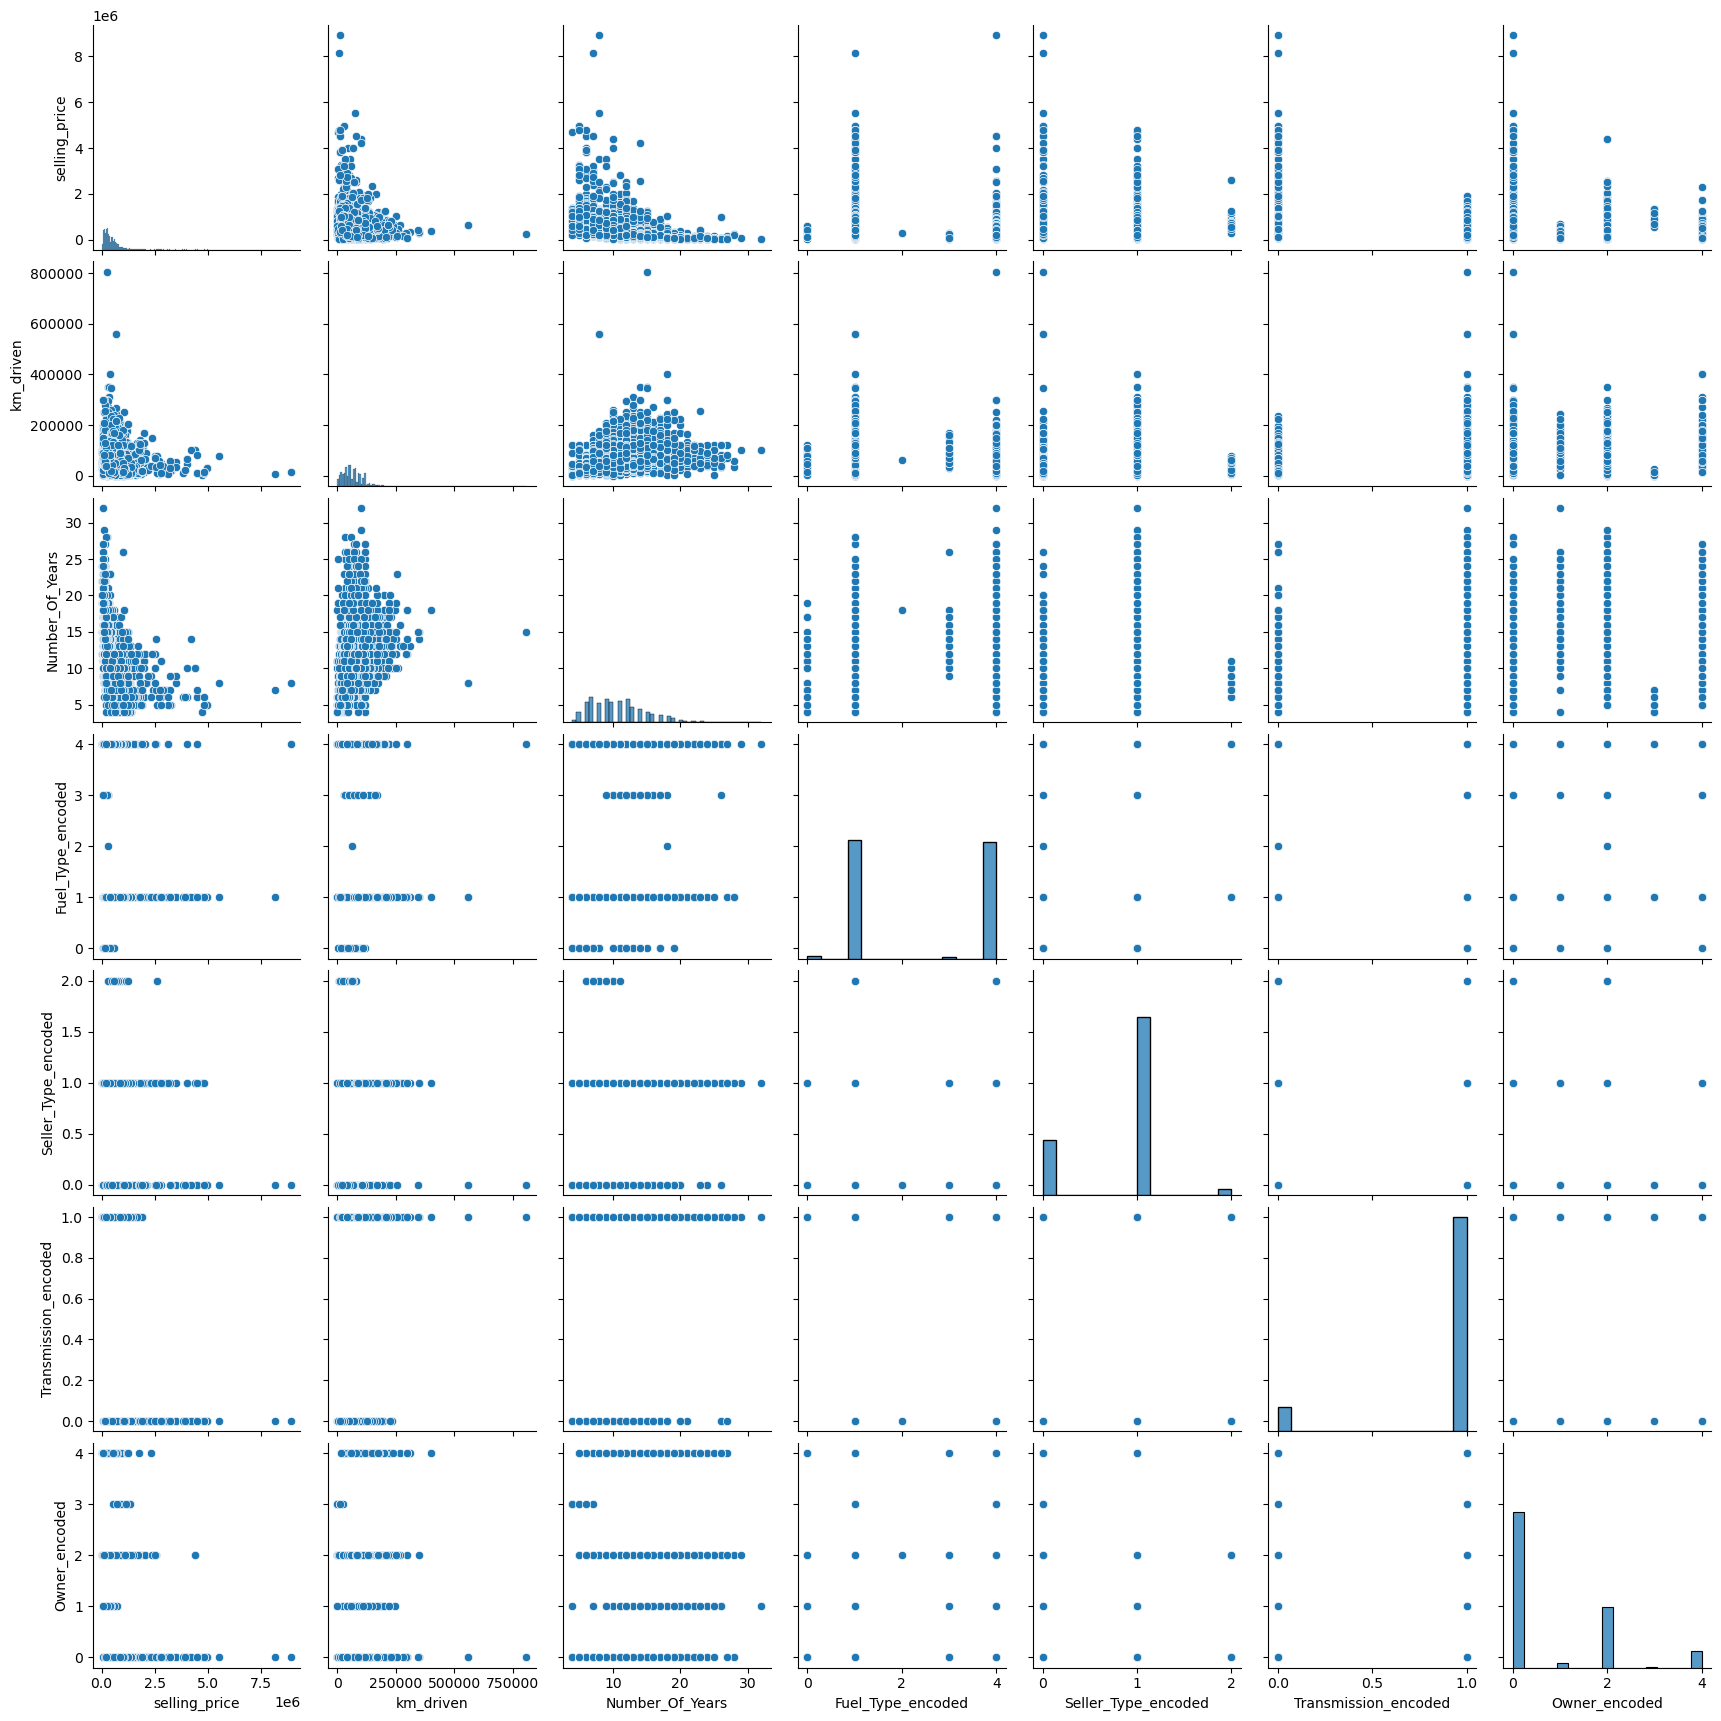

In [49]:
# ahora generamos este el código para crear un gráfico de pares para explorar relaciones entre variables en nuestro df(dataframe) mientras oculta las advertencias futuras para una visualización más limpia.
import seaborn as sns 
import warnings

sns.pairplot(df)

# Ignore all FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

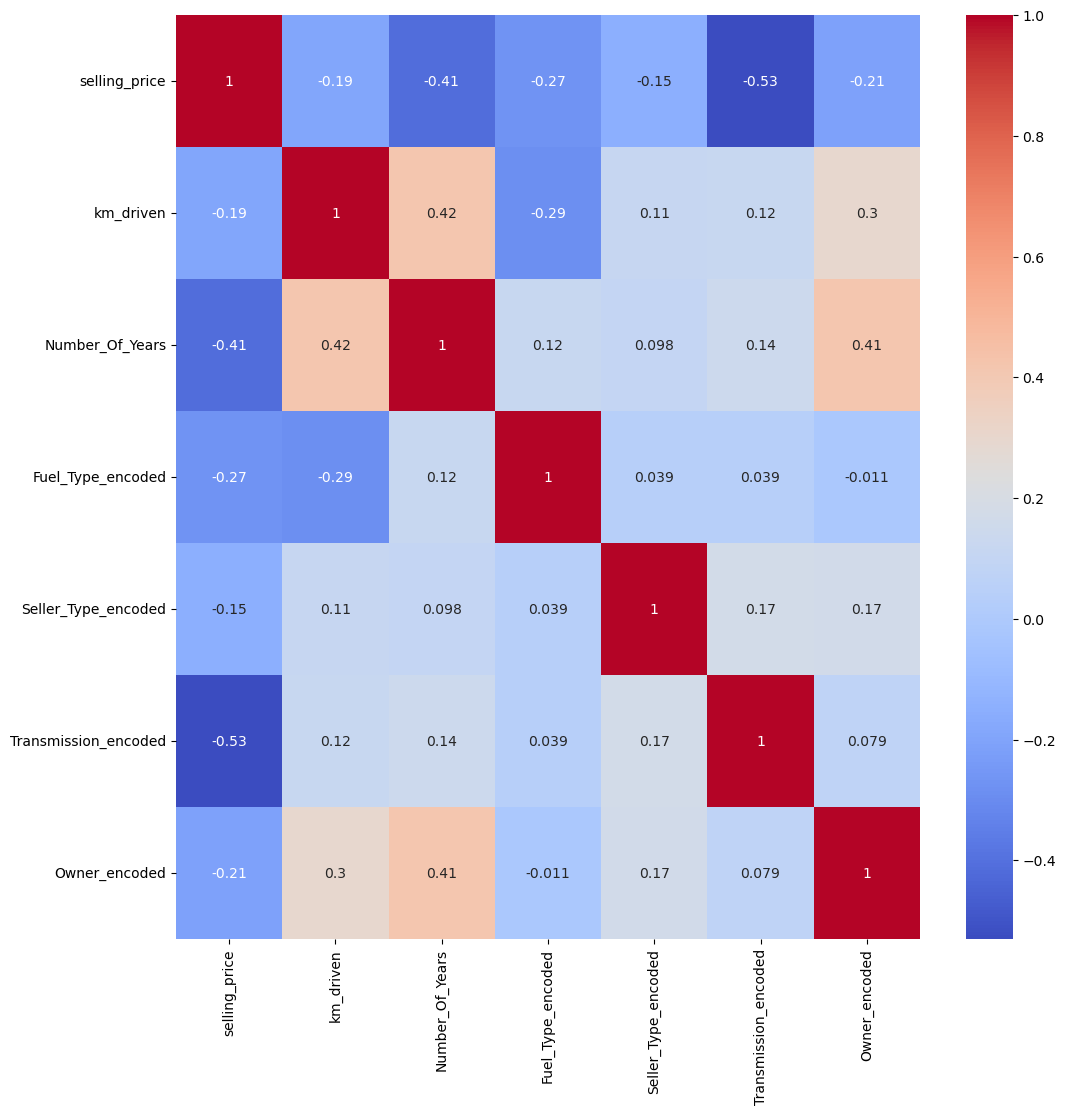

In [51]:
# Ahora genero un mapa de calor (heatmap) que muestra las correlaciones entre las variables numéricas de mi DataFrame df.
corr= df.corr()
plt.figure(figsize=(12,12))
g=sns.heatmap(corr, annot=True, cmap='coolwarm')

In [55]:
# Eliminamos las variables que están menos correlacionadas con la variable objetivo.
df= df.drop('Owner_encoded', axis=1)
df= df.drop('km_driven', axis=1)

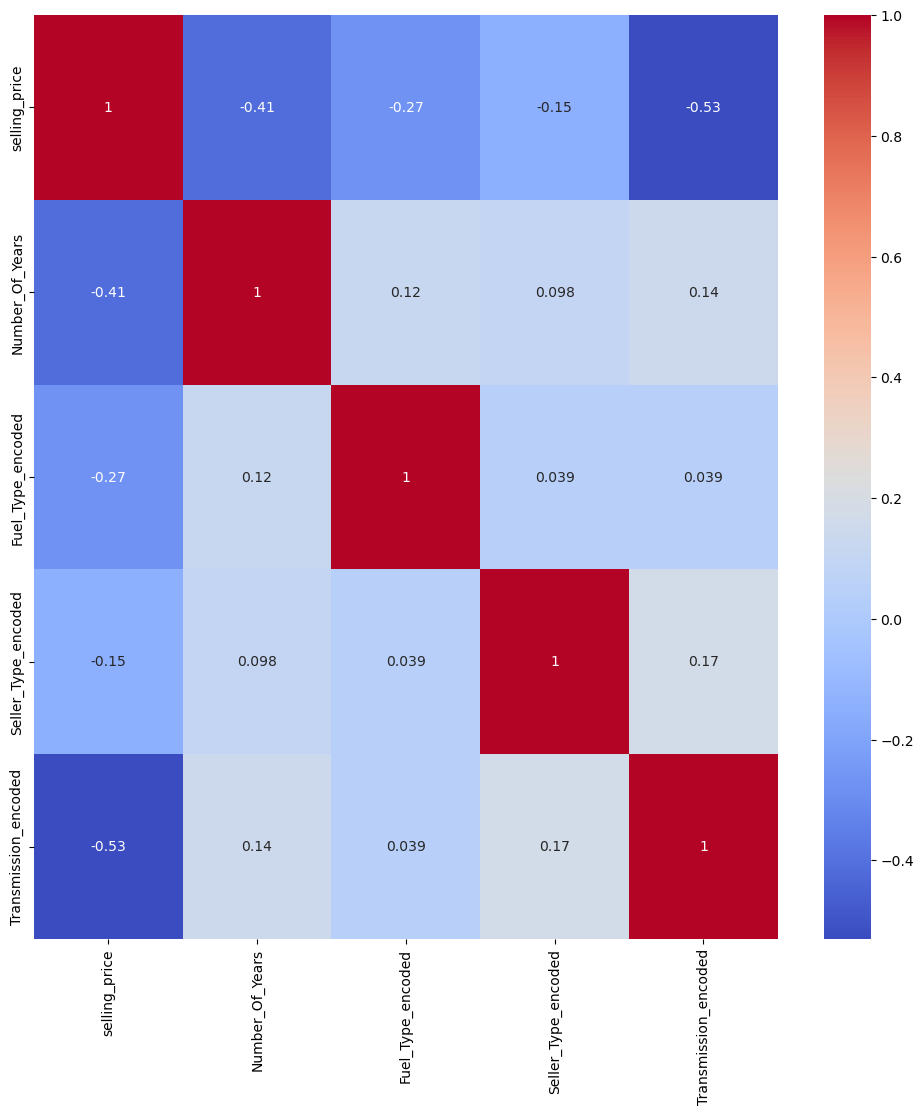

In [57]:
# observamos nuevamente como quedo nuestro mapa con las variables anteriores eliminadas
corr= df.corr()
plt.figure(figsize=(12,12))
g=sns.heatmap(corr, annot=True, cmap='coolwarm')

Resultados del modelo Gradient Boosting:
R-squared: 0.9977880267081066
Adjusted R-squared: 0.9977854724664301
RMSE: 25981.31101962528
      Actual      Predicted
3978  165000  165298.786815
1448  250000  248792.570994
2664  120000  118932.073110
17    450000  449217.776709
1634  730000  744337.818542

Resultados del modelo de Regresión Lineal:
R-squared: 1.0
RMSE: 4.879286804018134e-10


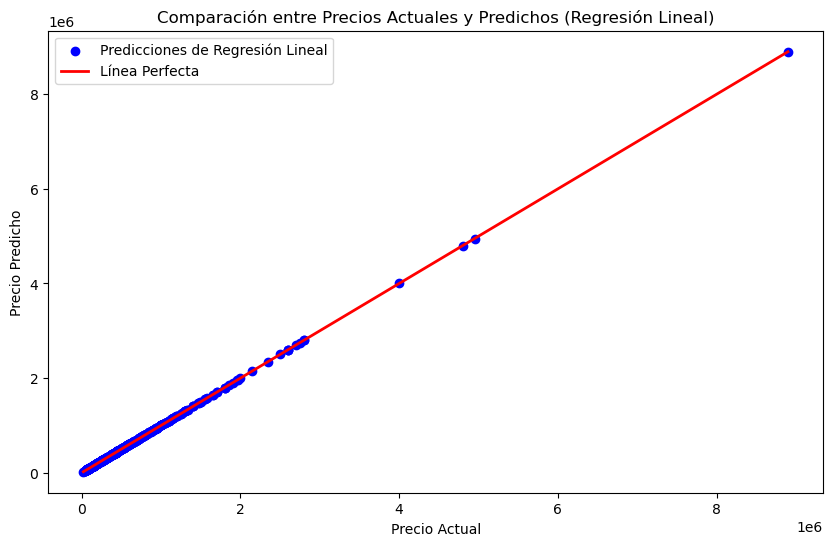

In [63]:
#Importando Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defininiendo las variables independientes (X) y dependiente (y)
X = df.drop(columns=['Number_Of_Years', 'Fuel_Type_encoded', 'Seller_Type_encoded', 'Transmission_encoded'])  
y = df['selling_price']

# Dividiendo el dataset en entrenamiento (Train) y prueba (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando y entrenando el modelo de Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Haciendo predicciones con Gradient Boosting en el conjunto de prueba
y_pred_gbr = gbr.predict(X_test)

# Calculando métricas de rendimiento para Gradient Boosting
r_squared_gbr = r2_score(y_test, y_pred_gbr)
n = X_test.shape[0]  # Número de muestras
p = X_test.shape[1]  # Número de características
adjusted_r_squared_gbr = 1 - (1 - r_squared_gbr) * (n - 1) / (n - p - 1)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

# Mostrando los resultados del modelo Gradient Boosting
print("Resultados del modelo Gradient Boosting:")
print(f"R-squared: {r_squared_gbr}")
print(f"Adjusted R-squared: {adjusted_r_squared_gbr}")
print(f"RMSE: {rmse_gbr}")
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gbr}).head())

# Inicializando y entrenando el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Haciendo predicciones con regresión lineal en el conjunto de prueba
y_pred_lr = lr.predict(X_test)

# Calculando métricas de rendimiento para la regresión lineal
r_squared_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("\nResultados del modelo de Regresión Lineal:")
print(f"R-squared: {r_squared_lr}")
print(f"RMSE: {rmse_lr}")

# Graficando los resultados de la regresión lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Predicciones de Regresión Lineal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Línea Perfecta')
plt.xlabel('Precio Actual')
plt.ylabel('Precio Predicho')
plt.title('Comparación entre Precios Actuales y Predichos (Regresión Lineal)')
plt.legend()
plt.show()